Autoencoders / Otokodlayacılar

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# %pip install scikit-image
from skimage.metrics import structural_similarity as ssim

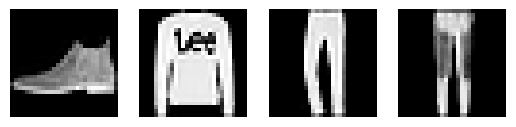

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# veri normalizasyonu
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# görsellestirme

plt.figure()
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
plt.show()

# veri düzleştirme
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
# encoder ve decoder mimarisi olusturma , bunları autoencoders mimarisine ekleme ve train etme

# autoencoder modeli için param
input_dim = x_train.shape[1] # giris boyutu (784)
encoding_dim = 64   # latent boyutu (daha kucuk boyut)

# encoder katmanı
input_img = Input(shape=(input_dim,)) #girdi boyutunu belirtme (784)
encoded = Dense(256, activation='relu')(input_img) # encoder katmanı     (256 noron)
encoded = Dense(128, activation='relu')(encoded)   # ikinci gizli katman (128 noron)
encoded = Dense(64 , activation='relu')(encoded)   # sıkıstırma katmanı  (64  boyut)

# decoder katmanı
decoded = Dense(128, activation='relu')(encoded)   # ilk genisletme katmanı
decoded = Dense(256 , activation='relu')(decoded)   # ikinci genisletme katmanı
decoded = Dense(input_dim, activation='sigmoid') (decoded) # cıktı katmanı (784 boyutlu)

# autoencoder olusturma , encoder + decoder
autoencoder = Model(input_img, decoded)
#modeli compile etme
autoencoder.compile(optimizer= Adam(), loss='binary_crossentropy')
# modeli train edilmesi
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.3890 - val_loss: 0.3013
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2965 - val_loss: 0.2906
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2866 - val_loss: 0.2851
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2824 - val_loss: 0.2819
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2792 - val_loss: 0.2798
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2772 - val_loss: 0.2782
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2760 - val_loss: 0.2765
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2738 - val_loss: 0.2756
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2736 - val_loss: 0.2747
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2722 - val_loss: 0.2745
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2712 - val_loss: 0.2730
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


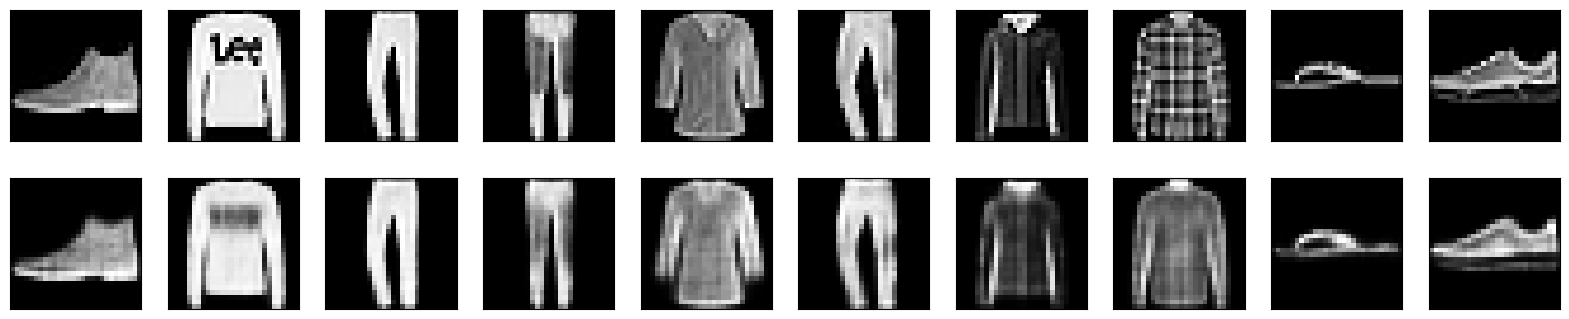

In [11]:
# Model testi

# modeli encoder ve decoder olarak ayırma
encoder = Model(input_img, encoded)

# decoder 
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_output = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_output)

# test verisi üzerinde encoder ve decoder uygulama
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # orijinal resim
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # decode edilmis resim
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [12]:
def compute_ssim(origi, recon):
    # her iki gotunun ssim degerini hesaplama (0-1 arasında)
    origi = origi.reshape(28, 28)
    recon = recon.reshape(28, 28)
    return ssim(origi, recon, data_range=1)

ssim_score = []

for i in range(100):
    origi = x_test[i]
    recon = decoded_imgs[i]
    score = compute_ssim(origi, recon)
    ssim_score.append(score)

avr_score = np.mean(ssim_score)
print("Average SSIM: ", avr_score)

Average SSIM:  0.8181991816096911
